# Volume 4: Total Variation
    Daniel Perkins
    MATH 439
    1/16/25

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Problem 1

Using $20$ $x$ steps, $250$ time steps, $a=-1$, $b=1$, $\alpha = 1$, $\beta=7$, and a final time of $0.2$, plot the solution that minimizes (17.4). It should match figure 17.1.

Difference in iterations is  0.0
Final time =  0.2


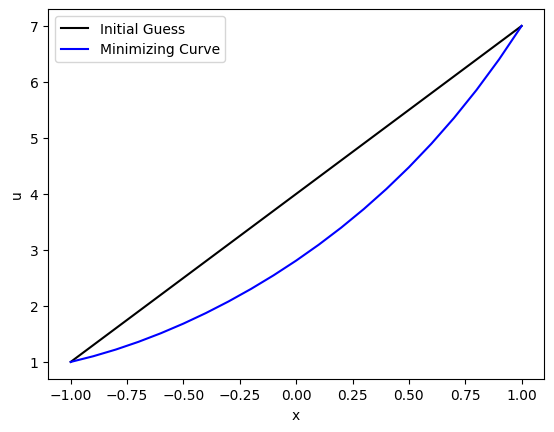

In [30]:
# Set up initial variables
a, b = -1., 1.
alpha, beta = 1, 7
num_x_steps = 20
num_time_steps = 250
xs = np.linspace(a, b, num_x_steps+1)
ts = np.linspace(0, 0.2, num_time_steps+1)
delta_x = xs[1] - xs[0]
delta_t = ts[1] - ts[0]

# Check the stability condition
if delta_t/delta_x**2. > .5: print("Stability Condition Fails")

# Set up initial data
u = np.empty((2, num_x_steps+1))
u[0] = (beta - alpha)/(b-a)*(xs-a) + alpha
u[1] = (beta - alpha)/(b-a)*(xs-a) + alpha
initial_guess = u.copy()

# Define right hand side of difference scheme
def rhs(y):
    # Approximate first and second derivatives to second order accuracy
    yp = (np.roll(y, -1) - np.roll(y, 1)) / (2.*delta_x)
    ypp = (np.roll(y, -1) - 2.*y + np.roll(y, 1))/ (delta_x**2)
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])
    return y

# Time step until successive iterations are close
iteration = 0
while iteration < num_time_steps:
    u[1] = rhs(u[1])
    if np.linalg.norm(np.abs((u[0]-u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration += 1
    
print("Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

# Plot it
plt.plot(xs, initial_guess[1], color="Black", label="Initial Guess")
plt.plot(xs, u[1], color="Blue", label="Minimizing Curve")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.show()


# Problem 2

Using $\Delta t = 1e{-3},$ $\lambda = 40,$ $\Delta x = 1,$ and $\Delta y = 1$, implement the numerical scheme mentioned above to obtain a solution $u$. (So $\Omega = [0,n_x]\times [0,n_y]$, where $n_x$ and $n_y$ represent the number of pixels in the $x$ and $y$ dimensions, respectively.) Take 250 steps in time. Plot the original image as well as the image with noise. Compare your results with Figure 17.3.

# Problem 3

Using $\Delta t = 1e-3, \lambda = 1, \Delta x = 1,$ and $ \Delta y = 1$, implement the numerical scheme mentioned above to obtain a solution $u$.  Take 200 steps in time. Display both the diffusion-based and total variaton images of the balloon. Compare your results with
Figure 17.3. How small should ε be?